### Principal component analysis

##### Import dataset and necessary packages

In [1]:
import pandas as pd

df = pd.read_csv('data-iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
X = df.loc[:, df.columns!='species']
y = df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


###### Since there are 4 feature variables in our dataset, so the dimension of this dataset will also be 4. From this dataset we can get maximum 4 principal components

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled)
principalDf = pd.DataFrame(pca.transform(scaled), columns=['pc-1','pc-2','pc-3','pc-4'])
principalDf

,pc-1,pc-2,pc-3,pc-4
0,-0.630361,0.111556,-0.016993,-0.006891
1,-0.623546,-0.100313,-0.047120,-0.032316
2,-0.669793,-0.047220,0.021648,-0.007186
3,-0.654633,-0.098791,0.025214,0.020285
4,-0.648263,0.137558,0.016813,0.012302
...,...,...,...,...
145,0.551755,0.058990,0.085968,-0.109943
146,0.406278,-0.172227,-0.003916,-0.065545
147,0.447293,0.036996,0.049336,-0.032655
148,0.489218,0.149121,0.238719,0.003414


###### Now, if we add the target variable to the principal component, we will see a completely modified dataset.

In [16]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head()

,pc-1,pc-2,pc-3,pc-4,species
0,-0.630361,0.111556,-0.016993,-0.006891,setosa
1,-0.623546,-0.100313,-0.047120,-0.032316,setosa
2,-0.669793,-0.047220,0.021648,-0.007186,setosa
3,-0.654633,-0.098791,0.025214,0.020285,setosa
4,-0.648263,0.137558,0.016813,0.012302,setosa


###### This time we will look at how much information each component holds or how important it is within the 4 principal components. From the array below we can see that the 1st and 2nd component contain about 95.7% of the information in the dataset or can explain the dataset. The 3rd and 4th principal components are insignificant or less important than that.


In [18]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

#### Now Plot the dataset

<AxesSubplot:xlabel='PC', ylabel='var'>

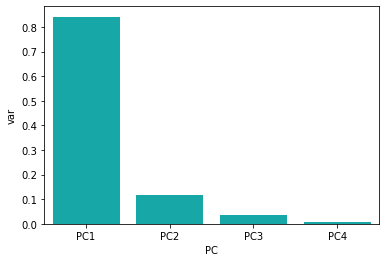

In [23]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC', y='var', data=dfexp, color="c")

##### Now if we plot with the two main principal components then it is easy to understand how these two principal components can explain the dataset.

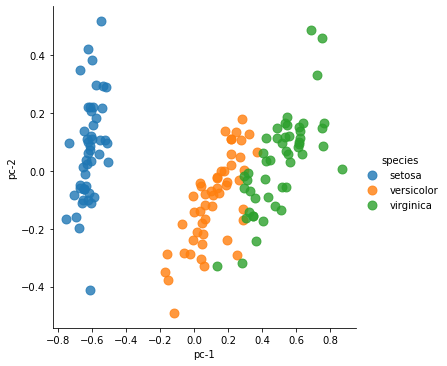

In [24]:
import matplotlib.pyplot as plt
sns.lmplot( x="pc-1", y="pc-2",data=finalDf, fit_reg=False,  hue='species', legend=True,scatter_kws={"s": 80})